# ChatGPT

🧠 The Scenario

You’re a Data Scientist for an online food delivery startup. Your boss just dumped raw CSV files on your desk and wants “insights by Monday” (classic corporate move, right? 😅).
Your job: Clean, merge, explore, and produce actionable insights — no excuses.

# 1. Data Wrangling

Load all 3 datasets into Pandas.

Check for missing values and decide how to handle them (justify your choice).

Identify and remove duplicate entries.

Standardize date formats (YYYY-MM-DD).

Ensure data types are correct (e.g., order_amount as numeric).

Handle inconsistent naming in city and restaurant_name columns (e.g., "mumbai" vs "Mumbai").

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Load all the datasets
customers = pd.read_csv('customers.csv')
orders = pd.read_csv('orders.csv')
restaurants = pd.read_csv('restaurants.csv')

In [37]:
# Finding duplicates and Null values

print("Customers Duplicate Data:", customers.duplicated().sum())
print("Orders Duplicate Data:",orders.duplicated().sum())
print("Restaurants Duplicate Data:",restaurants.duplicated().sum())
print("----------------------")
print("Customers Null Data:\n", customers.isna().sum())
print("----------------------")
print("Orders Null Data:\n", orders.isna().sum())
print("----------------------")
print("Restaurants Null Data:\n", restaurants.isna().sum())

Customers Duplicate Data: 0
Orders Duplicate Data: 0
Restaurants Duplicate Data: 0
----------------------
Customers Null Data:
 customer_id    0
name           0
signup_date    0
city           0
age            0
gender         0
dtype: int64
----------------------
Orders Null Data:
 order_id           0
customer_id        0
restaurant_name    0
order_date         0
order_amount       0
payment_method     0
dtype: int64
----------------------
Restaurants Null Data:
 restaurant_id      0
restaurant_name    0
cuisine_type       0
rating             0
city               0
dtype: int64


In [117]:
# Correcting the naming conventions

customers['city'] = customers['city'].str.title()
orders['restaurant_name'] = orders['restaurant_name'].str.title()
restaurants['city'] = restaurants['city'].str.title()
restaurants['restaurant_name'] = restaurants['restaurant_name'].str.title()
orders['order_date'] = pd.to_datetime(orders['order_date'])

# 2. Data Merging

Merge orders with customers on customer_id.

Merge that with restaurants on restaurant_name.

The final dataset should have all customer, order, and restaurant info in one DataFrame.

In [39]:
customers_orders = pd.merge(left=orders, right=customers, how='left', left_on='customer_id', right_on='customer_id')

In [40]:
cor = pd.merge(left=customers_orders, right=restaurants, how='left', left_on='restaurant_name', right_on='restaurant_name')

# 3. Exploratory Data Analysis (EDA)

Perform at least 8 different EDA tasks, including:

Distribution of customers by city.

Top 5 restaurants by total revenue.

Average order value by cuisine type.

Payment method usage distribution.

Monthly order trends (line chart).

Age group analysis (e.g., <25, 25-40, 40+) vs average order amount.

Correlation between restaurant ratings and order amount.

Outlier detection in order_amount.

In [116]:
# 1. Distribution of customers by city.

amdb = customers[customers['city'] == "Ahmedabad"]
mum = customers[customers['city'] == "Mumbai"]
bang = customers[customers['city'] == "Bengaluru"]
delhi = customers[customers['city'] == "Delhi"]

In [42]:
# 2. Top 5 restaurants by total revenue.

cor.groupby('restaurant_name')['order_amount'].sum().sort_values(ascending=False)

,order_amount
restaurant_name,
Foodie Hub,3980
Zaika Express,2280
Spicy Treat,1449
Biryani Palace,340


In [111]:
# 3. Average order value by cuisine type.

cuisines = cor.groupby('cuisine_type')['order_amount'].mean()

In [110]:
# 4. Payment method usage distribution.

cor['payment_method'].value_counts()

,count
payment_method,
UPI,5
Credit Card,4
Cash,1
Debit Card,1


In [45]:
# 5. Monthly order trends (line chart).

# I didn't have the clarity of the question.

In [46]:
# 6. Age group analysis (e.g., <25, 25-40, 40+) vs average order amount.

# Create age groups
bins = [0, 25, 40, np.inf]
labels = ['<25', '25-40', '40+']
cor['age_group'] = pd.cut(cor['age'], bins=bins, labels=labels, right=False)

cor.groupby('age_group')['order_amount'].mean()

/tmp/ipython-input-334104097.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cor.groupby('age_group')['order_amount'].mean()


,order_amount
age_group,
<25,266.666667
25-40,1021.500000
40+,560.000000


In [47]:
# 7. Correlation between restaurant ratings and order amount.

cor.groupby('rating')['order_amount'].mean()

,order_amount
rating,
3.8,340.000000
4.0,663.333333
4.1,663.333333
4.2,724.500000
4.5,1140.000000


<Axes: ylabel='order_amount'>

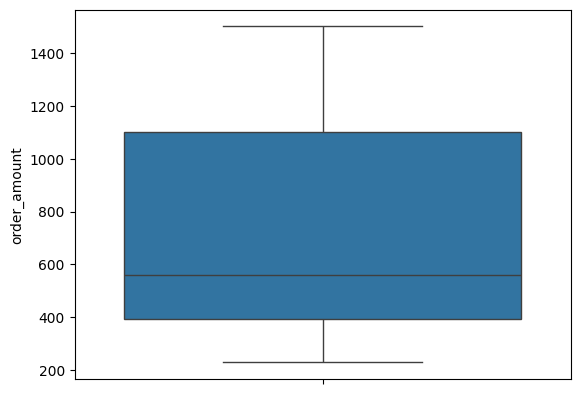

In [48]:
# 8. Outlier detection in order_amount.

sns.boxplot(cor['order_amount'])

# 4. Visualization Requirements

Use Matplotlib/Seaborn.

Make at least 5 clear, well-labeled plots.

Use meaningful color palettes and titles (no “Plot 1” type titles 😜).

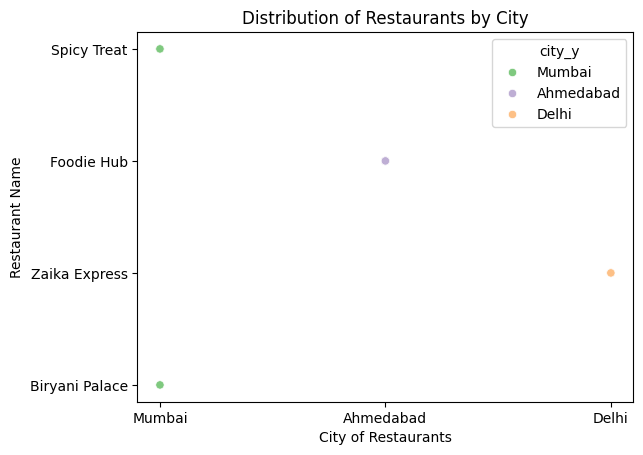

In [50]:
# 1. Restro vs City of Restro

sns.scatterplot(x=cor['city_y'], y=cor['restaurant_name'], hue=cor['city_y'], palette='Accent')
plt.xlabel('City of Restaurants')
plt.ylabel('Restaurant Name')
plt.title('Distribution of Restaurants by City')
plt.show()

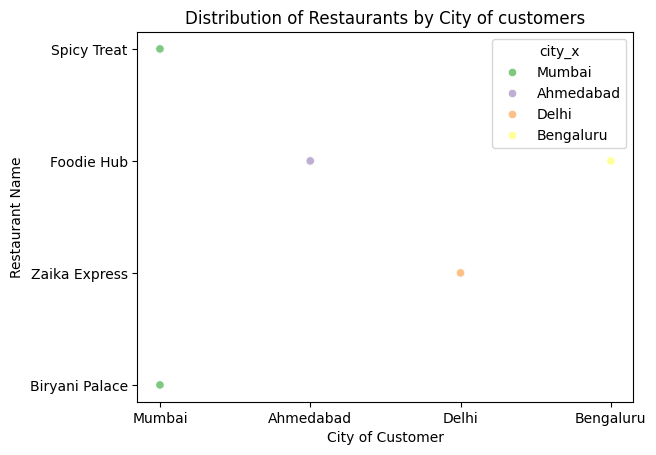

In [51]:
# 2. Restro vs City of customers

sns.scatterplot(x=cor['city_x'], y=cor['restaurant_name'], hue=cor['city_x'], palette='Accent')
plt.xlabel('City of Customer')
plt.ylabel('Restaurant Name')
plt.title('Distribution of Restaurants by City of customers')
plt.show()

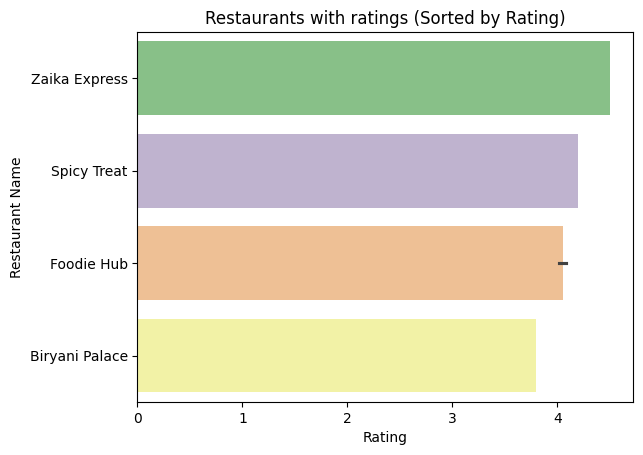

In [61]:
# 3. Restro vs Rating

cor_sorted_by_rating = cor.sort_values(by='rating', ascending=False)
sns.barplot(x=cor_sorted_by_rating['rating'], y=cor_sorted_by_rating['restaurant_name'], hue=cor_sorted_by_rating['restaurant_name'], palette='Accent', dodge=False)
plt.xlabel('Rating')
plt.ylabel('Restaurant Name')
plt.title('Restaurants with ratings (Sorted by Rating)')
plt.show()

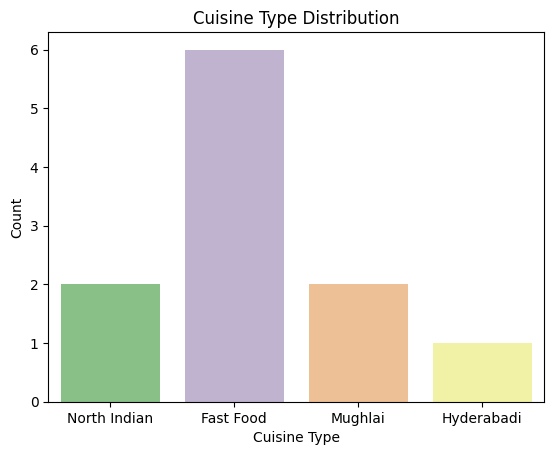

In [66]:
# 4. Cuisine type

sns.countplot(x=cor['cuisine_type'], hue=cor['cuisine_type'], palette='Accent')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.title('Cuisine Type Distribution')
plt.show()

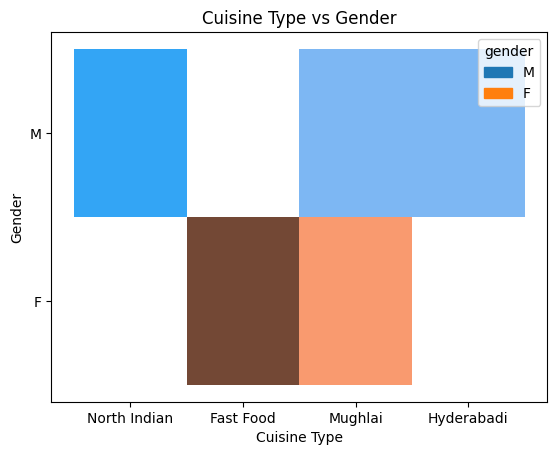

In [74]:
# 5. Cuisine type vs Gender

sns.histplot(data=cor, x='cuisine_type', y='gender', hue='gender')
plt.xlabel('Cuisine Type')
plt.ylabel('Gender')
plt.title('Cuisine Type vs Gender')
plt.show()

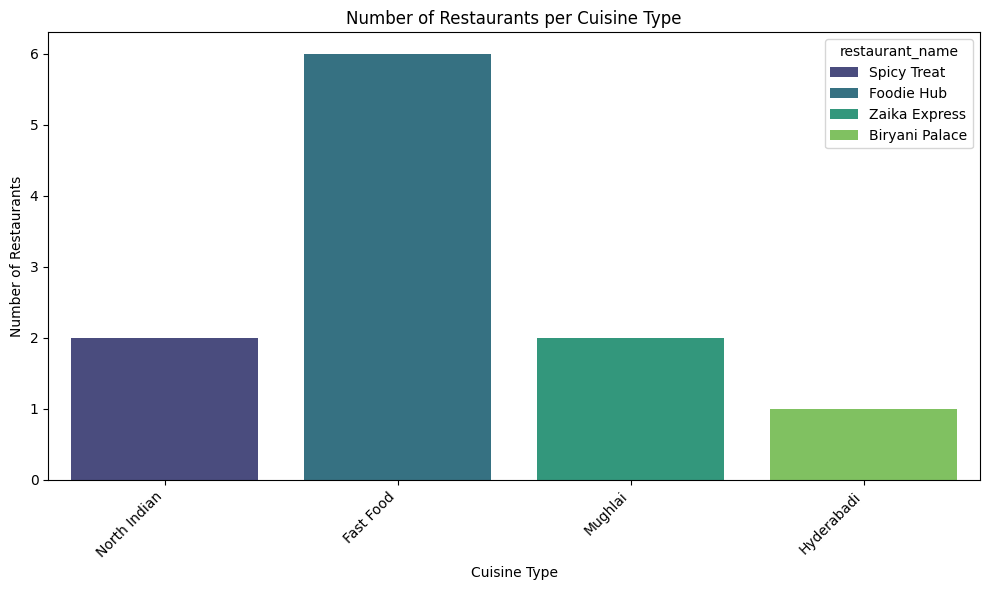

In [83]:
# 6. Cuisine type vs Restaurants - Visualization (Count Plot)

plt.figure(figsize=(10, 6))
sns.countplot(x='cuisine_type', data=cor, hue='restaurant_name', palette='viridis')
plt.title('Number of Restaurants per Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

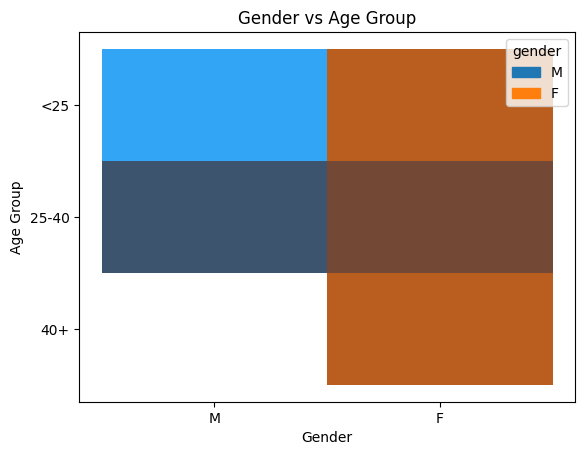

In [97]:
# 7. Gender vs Age group

sns.histplot(data=cor, x='gender', y='age_group', hue='gender')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.title('Gender vs Age Group')
plt.show()

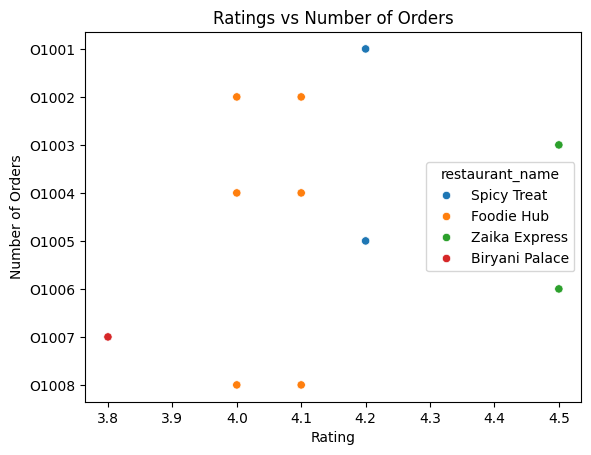

In [109]:
# 8. Ratings vs Number of Orders

sns.scatterplot(data=cor, x='rating', y='order_id', hue='restaurant_name')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.title('Ratings vs Number of Orders')
plt.show()

# 5. Insights & Reporting

Write 5–7 business insights from your analysis.

Suggest 2 actionable recommendations to improve revenue or customer satisfaction.

Keep the tone as if you’re presenting to management — clear, concise, and backed by data.

According to my analysis on the customers, orders, and restaurants datasets I have concluded following insights:

1. Females are tend to order Fast-Food than any other cuisine types.

2. On the other hand Males order North Indian food and no fast-food orders from males.

3. In terms of restaurants, Foodie Hub seems more go-to place to order food.

4. Zaika Express, Spicy Treat, and Foodie Hub are the highest rated restaurants.

5. According to the data, we have reliable data on ratings of Foodie Hub as there are 6 orders from it. So we can assume that Foodie Hub is really 4 rated in taste and other aspects.

Recommendations

1. We must suggest Zaika Express and Spicy Treat more to customers as its has high food cost and high ratings so far. This will increase the revenue and reliability of the data.

2. For customer satisfaction, we must gather the "Return Rate" of the food ordered or query for "Can I get my money back?". If we have this we can suggest the customers based on their preference of cuisine type and the quality of food.